# Big Mart Sales Prediction

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

### importing the dataset

In [2]:
# importing the test and train csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
## Data exploration of Train Data

In [4]:
print('dimension of train set are {}\ndimension of test set are {}\n'.format(train.shape,test.shape))

dimension of train set are (8523, 12)
dimension of test set are (5681, 11)



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
## Extracting X and y from train dataset
X = train.iloc[:,0:-1]
y =train['Item_Outlet_Sales']
print("Xtrain shape is {}\nytrain shape is {}\n".format(X.shape,y.shape))

Xtrain shape is (8523, 11)
ytrain shape is (8523,)



In [9]:
# Outlet_Establishment_year does not carry any significance so adding the age of Outlet
# adding extra feature of Outlet_Age = max(Outlet_Establishment_Year)-(Outlet_Establishment_year)
X['Outlet_Age']=X['Outlet_Establishment_Year'].max() - X['Outlet_Establishment_Year']

In [10]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,11
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,22


In [11]:
# at first droping item identifier , outlet_identifier , outlet establishment year
X = X.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [12]:
### Item visibilty of 0 does not make any sense so imputing these 0 values with nan

In [13]:
X['Item_Visibility']=X['Item_Visibility'].mask(X['Item_Visibility']==0.0)

In [14]:
# missing values
X.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility          526
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Age                 0
dtype: int64

In [15]:
### missing values imputation

In [16]:
X['Item_Weight'].fillna(X['Item_Weight'].mean(),inplace=True)
X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0],inplace=True)
X['Item_Visibility'].fillna(X['Item_Visibility'].mean(),inplace=True)

In [17]:
X.isna().sum()


Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Outlet_Age              0
dtype: int64

In [18]:
# checking the categorical variables
X['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
# Unifying categories to Low Fat and Regular only
X['Item_Fat_Content'] = X['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [20]:
X['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
# Label encoding the categorical variables.

In [22]:
# # Import label encoder 
# from sklearn import preprocessing
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder()

# X['Item_Fat_Content']=label_encoder.fit_transform(X['Item_Fat_Content']) 
# #,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
# X['Outlet_Size']=label_encoder.fit_transform(X['Outlet_Size'])
# X['Outlet_Location_Type']=label_encoder.fit_transform(X['Outlet_Location_Type'])
# X['Outlet_Type']=label_encoder.fit_transform(X['Outlet_Type'])
# X['Item_Type']=label_encoder.fit_transform(X['Item_Type'])
# X.head()

In [23]:
# using pandas dummy variables for categorical variables 
#pd.get_dummies(df, prefix=['A', 'D'], columns=['A', 'D'])
X_dum=pd.get_dummies(X,columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type'],prefix=['Fat_is','Type_is','Loc_is','Size_is','Outlet_is'])
X_dum.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Fat_is_Low Fat,Fat_is_Regular,Type_is_Baking Goods,Type_is_Breads,Type_is_Breakfast,Type_is_Canned,...,Loc_is_Tier 1,Loc_is_Tier 2,Loc_is_Tier 3,Size_is_High,Size_is_Medium,Size_is_Small,Outlet_is_Grocery Store,Outlet_is_Supermarket Type1,Outlet_is_Supermarket Type2,Outlet_is_Supermarket Type3
0,9.30,0.016047,249.8092,10,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,17.50,0.016760,141.6180,10,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,19.20,0.070482,182.0950,11,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,8.93,0.070482,53.8614,22,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [24]:
list(X_dum.columns)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Age',
 'Fat_is_Low Fat',
 'Fat_is_Regular',
 'Type_is_Baking Goods',
 'Type_is_Breads',
 'Type_is_Breakfast',
 'Type_is_Canned',
 'Type_is_Dairy',
 'Type_is_Frozen Foods',
 'Type_is_Fruits and Vegetables',
 'Type_is_Hard Drinks',
 'Type_is_Health and Hygiene',
 'Type_is_Household',
 'Type_is_Meat',
 'Type_is_Others',
 'Type_is_Seafood',
 'Type_is_Snack Foods',
 'Type_is_Soft Drinks',
 'Type_is_Starchy Foods',
 'Loc_is_Tier 1',
 'Loc_is_Tier 2',
 'Loc_is_Tier 3',
 'Size_is_High',
 'Size_is_Medium',
 'Size_is_Small',
 'Outlet_is_Grocery Store',
 'Outlet_is_Supermarket Type1',
 'Outlet_is_Supermarket Type2',
 'Outlet_is_Supermarket Type3']

In [25]:
# ### checking correlation to check if there is any highly correlated variable
# X.corr()

In [26]:
# print("X shape is {} \ny shape is {} \n".format(X.shape,y.shape))

In [27]:
print("Xdummy shape is {} \ny shape is {} \n".format(X_dum.shape,y.shape))

Xdummy shape is (8523, 32) 
y shape is (8523,) 



In [28]:
# #normalizing the X from 0 to 1 using MinMaxScalar
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler=MinMaxScaler()
# X=min_max_scaler.fit_transform(X)
# X[:5]

In [29]:
for i in ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age',]:
    X_dum[i] = (X_dum[i]-X_dum[i].min())/(X_dum[i].max()-X_dum[i].min())

X_dum.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Fat_is_Low Fat,Fat_is_Regular,Type_is_Baking Goods,Type_is_Breads,Type_is_Breakfast,Type_is_Canned,...,Loc_is_Tier 1,Loc_is_Tier 2,Loc_is_Tier 3,Size_is_High,Size_is_Medium,Size_is_Small,Outlet_is_Grocery Store,Outlet_is_Supermarket Type1,Outlet_is_Supermarket Type2,Outlet_is_Supermarket Type3
0,0.282525,0.038399,0.927507,0.416667,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0.081274,0.048346,0.072068,0.000000,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0.770765,0.040593,0.468288,0.416667,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0.871986,0.205985,0.640093,0.458333,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0.260494,0.205985,0.095805,0.916667,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [30]:
# normalizing the continuous variables only
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler=MinMaxScaler()
# X_dum=min_max_scaler.fit_transform(X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age',]])
# X_dum.shape

In [31]:
# Test Train split 
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.3 ,shuffle = True,random_state =0)
# print(X_train.shape,y_train.shape);print(X_test.shape,y_test.shape)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_dum,y, test_size = 0.3 ,shuffle = True,random_state =0)
print(X_train.shape,y_train.shape);print(X_test.shape,y_test.shape)

(5966, 32) (5966,)
(2557, 32) (2557,)


In [33]:
# Building the Model using Keras
from keras.models import Sequential
# importing different layers from keras
from keras.layers import InputLayer, Dense , Dropout
from keras.optimizers import Adam,RMSprop
from keras.regularizers import l2

Using TensorFlow backend.


In [34]:
# defining the input and output neurons
input_neurons = X_train.shape[1]
output_neurons = 1

In [35]:
# model = Sequential()
# model.add(InputLayer(input_shape=(input_neurons,)))
# model.add(Dense(units=500,activation='relu',name='Input_Layer'))
# model.add(Dense(units=300,activation='relu',name='Layer1'))
# model.add(Dropout(0.5))
# model.add(Dense(units=100,activation='relu',name='Layer2'))
# model.add(Dropout(0.4))
# model.add(Dense(units=50,activation='relu',name='hidden_Layer3'))
# model.add(Dropout(0.3))
# model.add(Dense(units=output_neurons,activation='linear',name ='output_Layer'))

# model.compile(loss= "mse" , optimizer="RMSprop", metrics=["mae"])
# model.summary()

In [36]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=500,activation='relu',name='Input_Layer1'))
model.add(Dense(units=100,activation='relu',name='hidden_Layer1'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu',name='hidden_Layer2'))
model.add(Dropout(0.3))
model.add(Dense(units=output_neurons,activation='linear',name ='output_Layer'))

model.compile(loss= "mse" , optimizer="RMSprop", metrics=["mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer1 (Dense)         (None, 500)               16500     
_________________________________________________________________
hidden_Layer1 (Dense)        (None, 100)               50100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
hidden_Layer2 (Dense)        (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
output_Layer (Dense)         (None, 1)                 51        
Total params: 71,701
Trainable params: 71,701
Non-trainable params: 0
__________________________________________________

In [37]:
# removing history from memory
#del history
# training the model
history = model.fit(X_train, y_train, epochs=500, batch_size=len(X_train),validation_data =(X_test,y_test), verbose=1)

Train on 5966 samples, validate on 2557 samples
Epoch 1/500
5966/5966 [==============================] - 0s 53us/step - loss: 7551937.0000 - mae: 2167.4575 - val_loss: 7942394.0000 - val_mae: 2212.9927
Epoch 2/500
5966/5966 [==============================] - 0s 18us/step - loss: 7549454.5000 - mae: 2166.8984 - val_loss: 7939119.5000 - val_mae: 2212.2598
Epoch 3/500
5966/5966 [==============================] - 0s 18us/step - loss: 7546276.0000 - mae: 2166.1743 - val_loss: 7934754.5000 - val_mae: 2211.2815
Epoch 4/500
5966/5966 [==============================] - 0s 19us/step - loss: 7541948.5000 - mae: 2165.1760 - val_loss: 7929034.0000 - val_mae: 2209.9973
Epoch 5/500
5966/5966 [==============================] - 0s 20us/step - loss: 7536283.5000 - mae: 2163.8811 - val_loss: 7921593.5000 - val_mae: 2208.3276
Epoch 6/500
5966/5966 [==============================] - 0s 20us/step - loss: 7528701.5000 - mae: 2162.1526 - val_loss: 7911977.5000 - val_mae: 2206.1677
Epoch 7/500
5966/5966 [=====

Epoch 54/500
5966/5966 [==============================] - 0s 19us/step - loss: 3865228.5000 - mae: 1391.5439 - val_loss: 3975966.2500 - val_mae: 1419.2772
Epoch 55/500
5966/5966 [==============================] - 0s 18us/step - loss: 3724665.0000 - mae: 1371.0199 - val_loss: 3875113.2500 - val_mae: 1402.9182
Epoch 56/500
5966/5966 [==============================] - 0s 19us/step - loss: 3650786.2500 - mae: 1357.1208 - val_loss: 3778458.7500 - val_mae: 1387.4519
Epoch 57/500
5966/5966 [==============================] - 0s 19us/step - loss: 3560877.0000 - mae: 1343.6803 - val_loss: 3685387.2500 - val_mae: 1372.9320
Epoch 58/500
5966/5966 [==============================] - 0s 19us/step - loss: 3469432.5000 - mae: 1331.3644 - val_loss: 3596053.7500 - val_mae: 1359.5944
Epoch 59/500
5966/5966 [==============================] - 0s 20us/step - loss: 3376015.0000 - mae: 1309.0576 - val_loss: 3511230.0000 - val_mae: 1347.1930
Epoch 60/500
5966/5966 [==============================] - 0s 20us/step

Epoch 107/500
5966/5966 [==============================] - 0s 18us/step - loss: 2515073.7500 - mae: 1231.6816 - val_loss: 2542649.5000 - val_mae: 1253.4442
Epoch 108/500
5966/5966 [==============================] - 0s 18us/step - loss: 2501928.7500 - mae: 1235.6060 - val_loss: 2533340.2500 - val_mae: 1252.9104
Epoch 109/500
5966/5966 [==============================] - 0s 18us/step - loss: 2505622.7500 - mae: 1238.4861 - val_loss: 2527295.0000 - val_mae: 1250.1877
Epoch 110/500
5966/5966 [==============================] - 0s 19us/step - loss: 2503187.0000 - mae: 1233.6519 - val_loss: 2521574.2500 - val_mae: 1247.2994
Epoch 111/500
5966/5966 [==============================] - 0s 19us/step - loss: 2508443.2500 - mae: 1227.6923 - val_loss: 2511992.5000 - val_mae: 1246.4009
Epoch 112/500
5966/5966 [==============================] - 0s 17us/step - loss: 2471848.2500 - mae: 1221.4774 - val_loss: 2504474.7500 - val_mae: 1244.1851
Epoch 113/500
5966/5966 [==============================] - 0s 19

Epoch 160/500
5966/5966 [==============================] - 0s 22us/step - loss: 1925995.0000 - mae: 1058.7847 - val_loss: 1904850.5000 - val_mae: 1064.2080
Epoch 161/500
5966/5966 [==============================] - 0s 19us/step - loss: 1907864.6250 - mae: 1049.8235 - val_loss: 1890058.8750 - val_mae: 1058.3833
Epoch 162/500
5966/5966 [==============================] - 0s 19us/step - loss: 1906924.3750 - mae: 1044.2174 - val_loss: 1872948.2500 - val_mae: 1054.0120
Epoch 163/500
5966/5966 [==============================] - 0s 20us/step - loss: 1891555.8750 - mae: 1044.2090 - val_loss: 1863533.0000 - val_mae: 1044.6287
Epoch 164/500
5966/5966 [==============================] - 0s 19us/step - loss: 1890921.8750 - mae: 1040.5211 - val_loss: 1842437.7500 - val_mae: 1043.4329
Epoch 165/500
5966/5966 [==============================] - 0s 18us/step - loss: 1841944.7500 - mae: 1030.6272 - val_loss: 1826236.8750 - val_mae: 1038.8170
Epoch 166/500
5966/5966 [==============================] - 0s 18

5966/5966 [==============================] - 0s 18us/step - loss: 1425622.7500 - mae: 848.8657 - val_loss: 1358060.5000 - val_mae: 832.9685
Epoch 214/500
5966/5966 [==============================] - 0s 19us/step - loss: 1429971.1250 - mae: 838.7347 - val_loss: 1337641.8750 - val_mae: 837.1074
Epoch 215/500
5966/5966 [==============================] - 0s 19us/step - loss: 1410113.8750 - mae: 845.7506 - val_loss: 1354766.6250 - val_mae: 827.6534
Epoch 216/500
5966/5966 [==============================] - 0s 19us/step - loss: 1425187.1250 - mae: 831.4823 - val_loss: 1324539.3750 - val_mae: 837.9498
Epoch 217/500
5966/5966 [==============================] - 0s 19us/step - loss: 1415672.2500 - mae: 845.9255 - val_loss: 1357105.5000 - val_mae: 823.8027
Epoch 218/500
5966/5966 [==============================] - 0s 18us/step - loss: 1388555.5000 - mae: 823.6732 - val_loss: 1316182.5000 - val_mae: 833.9883
Epoch 219/500
5966/5966 [==============================] - 0s 18us/step - loss: 1402272.25

Epoch 267/500
5966/5966 [==============================] - 0s 18us/step - loss: 1349589.7500 - mae: 806.0530 - val_loss: 1256550.1250 - val_mae: 789.9856
Epoch 268/500
5966/5966 [==============================] - 0s 18us/step - loss: 1310279.8750 - mae: 796.9547 - val_loss: 1242153.3750 - val_mae: 790.7783
Epoch 269/500
5966/5966 [==============================] - 0s 17us/step - loss: 1385080.0000 - mae: 814.2242 - val_loss: 1261652.3750 - val_mae: 789.8135
Epoch 270/500
5966/5966 [==============================] - 0s 18us/step - loss: 1347365.7500 - mae: 799.9585 - val_loss: 1238741.5000 - val_mae: 791.4473
Epoch 271/500
5966/5966 [==============================] - 0s 19us/step - loss: 1342560.7500 - mae: 808.7947 - val_loss: 1269867.5000 - val_mae: 790.3626
Epoch 272/500
5966/5966 [==============================] - 0s 19us/step - loss: 1390913.2500 - mae: 813.3756 - val_loss: 1239514.7500 - val_mae: 790.7482
Epoch 273/500
5966/5966 [==============================] - 0s 19us/step - lo

Epoch 321/500
5966/5966 [==============================] - 0s 16us/step - loss: 1329225.2500 - mae: 790.6935 - val_loss: 1230685.3750 - val_mae: 785.6830
Epoch 322/500
5966/5966 [==============================] - 0s 17us/step - loss: 1340938.2500 - mae: 803.0991 - val_loss: 1252698.2500 - val_mae: 783.9936
Epoch 323/500
5966/5966 [==============================] - 0s 17us/step - loss: 1369771.7500 - mae: 807.2098 - val_loss: 1235640.0000 - val_mae: 784.1885
Epoch 324/500
5966/5966 [==============================] - 0s 28us/step - loss: 1357812.8750 - mae: 809.4358 - val_loss: 1250978.0000 - val_mae: 783.8602
Epoch 325/500
5966/5966 [==============================] - 0s 22us/step - loss: 1324488.0000 - mae: 795.4088 - val_loss: 1231985.1250 - val_mae: 784.7302
Epoch 326/500
5966/5966 [==============================] - 0s 22us/step - loss: 1350450.1250 - mae: 804.6849 - val_loss: 1255408.2500 - val_mae: 784.2747
Epoch 327/500
5966/5966 [==============================] - 0s 20us/step - lo

Epoch 375/500
5966/5966 [==============================] - 0s 19us/step - loss: 1337212.5000 - mae: 802.1287 - val_loss: 1242944.6250 - val_mae: 782.3088
Epoch 376/500
5966/5966 [==============================] - 0s 18us/step - loss: 1389696.1250 - mae: 812.9916 - val_loss: 1232255.0000 - val_mae: 782.3122
Epoch 377/500
5966/5966 [==============================] - 0s 18us/step - loss: 1361419.1250 - mae: 810.1646 - val_loss: 1247166.5000 - val_mae: 782.3577
Epoch 378/500
5966/5966 [==============================] - 0s 19us/step - loss: 1344912.1250 - mae: 801.8500 - val_loss: 1227711.8750 - val_mae: 782.6348
Epoch 379/500
5966/5966 [==============================] - 0s 18us/step - loss: 1320454.2500 - mae: 803.5773 - val_loss: 1252399.0000 - val_mae: 782.6528
Epoch 380/500
5966/5966 [==============================] - 0s 19us/step - loss: 1342783.8750 - mae: 801.1586 - val_loss: 1224468.7500 - val_mae: 784.6252
Epoch 381/500
5966/5966 [==============================] - 0s 19us/step - lo

Epoch 429/500
5966/5966 [==============================] - 0s 18us/step - loss: 1341503.1250 - mae: 806.2751 - val_loss: 1269879.0000 - val_mae: 784.3719
Epoch 430/500
5966/5966 [==============================] - 0s 17us/step - loss: 1320624.3750 - mae: 788.4180 - val_loss: 1219813.3750 - val_mae: 783.4442
Epoch 431/500
5966/5966 [==============================] - 0s 17us/step - loss: 1345902.5000 - mae: 805.8295 - val_loss: 1251263.3750 - val_mae: 781.4046
Epoch 432/500
5966/5966 [==============================] - 0s 19us/step - loss: 1350864.7500 - mae: 796.6614 - val_loss: 1221642.2500 - val_mae: 781.6086
Epoch 433/500
5966/5966 [==============================] - 0s 18us/step - loss: 1315718.7500 - mae: 803.1669 - val_loss: 1243326.3750 - val_mae: 780.3920
Epoch 434/500
5966/5966 [==============================] - 0s 18us/step - loss: 1356420.7500 - mae: 800.0120 - val_loss: 1224164.7500 - val_mae: 780.8456
Epoch 435/500
5966/5966 [==============================] - 0s 18us/step - lo

Epoch 483/500
5966/5966 [==============================] - 0s 17us/step - loss: 1329465.7500 - mae: 797.7013 - val_loss: 1228038.8750 - val_mae: 779.1514
Epoch 484/500
5966/5966 [==============================] - 0s 17us/step - loss: 1316799.2500 - mae: 796.0806 - val_loss: 1221991.1250 - val_mae: 779.7751
Epoch 485/500
5966/5966 [==============================] - 0s 18us/step - loss: 1354394.2500 - mae: 805.0708 - val_loss: 1240311.0000 - val_mae: 779.6116
Epoch 486/500
5966/5966 [==============================] - 0s 19us/step - loss: 1339494.7500 - mae: 798.3296 - val_loss: 1218649.1250 - val_mae: 780.2567
Epoch 487/500
5966/5966 [==============================] - 0s 19us/step - loss: 1308277.5000 - mae: 790.2421 - val_loss: 1236382.6250 - val_mae: 779.0154
Epoch 488/500
5966/5966 [==============================] - 0s 20us/step - loss: 1304396.6250 - mae: 787.4948 - val_loss: 1217679.6250 - val_mae: 780.6021
Epoch 489/500
5966/5966 [==============================] - 0s 19us/step - lo

In [38]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

1061.3928186744242


In [39]:
model.evaluate(X_train,y_train)

5966/5966 [==============================] - 0s 32us/step


[1126554.7207090177, 742.452880859375]

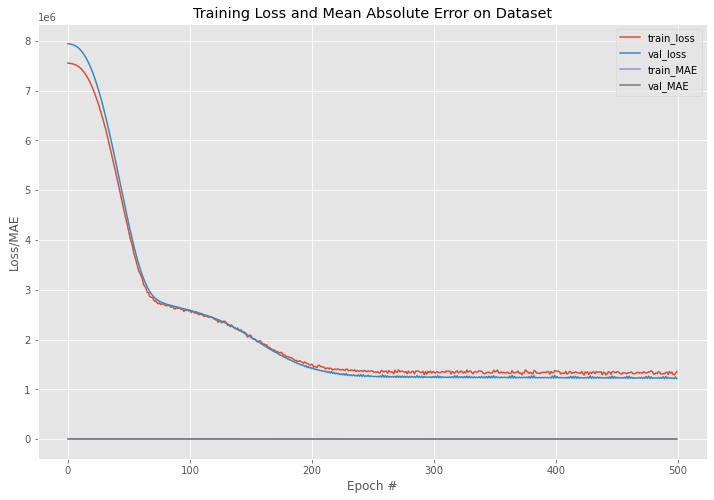

In [40]:
# plot the training loss and accuracy
N = np.arange(0, 500)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
#plt.figure(figure)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="train_MAE")
plt.plot(N, history.history["val_mae"], label="val_MAE")
plt.title("Training Loss and Mean Absolute Error on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend(loc="upper right")
#plt.savefig(args["plot"])

In [41]:
# Applying the same transformations to test dataset
# Outlet_Establishment_year does not carry any significance so adding the age of Outlet
# adding extra feature of Outlet_Age = max(Outlet_Establishment_Year)-(Outlet_Establishment_year)
test['Outlet_Age']=test['Outlet_Establishment_Year'].max() - test['Outlet_Establishment_Year']

In [42]:
submission = test[['Item_Identifier','Outlet_Identifier']].copy()

In [43]:
# at first droping item identifier , outlet_identifier , outlet establishment year
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [44]:
test['Item_Visibility']=test['Item_Visibility'].mask(test['Item_Visibility']==0.0)

In [45]:
test.isna().sum()

Item_Weight              976
Item_Fat_Content           0
Item_Visibility          353
Item_Type                  0
Item_MRP                   0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Age                 0
dtype: int64

In [46]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)
test['Item_Visibility'].fillna(test['Item_Visibility'].mean(),inplace=True)

In [47]:
# checking the categorical variables
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [48]:
# Unifying categories to Low Fat and Regular only
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [49]:
# # Import label encoder 
# from sklearn import preprocessing
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder()
# # Encode labels in column 'Country'. 
# test['Item_Fat_Content']=label_encoder.fit_transform(test['Item_Fat_Content']) 
# #,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
# test['Outlet_Size']=label_encoder.fit_transform(test['Outlet_Size'])
# test['Outlet_Location_Type']=label_encoder.fit_transform(test['Outlet_Location_Type'])
# test['Outlet_Type']=label_encoder.fit_transform(test['Outlet_Type'])
# test['Item_Type']=label_encoder.fit_transform(test['Item_Type'])
# test.head()

In [50]:
test_dum=pd.get_dummies(test,columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type'],prefix=['Fat_is','Type_is','Loc_is','Size_is','Outlet_is'])
test_dum.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Fat_is_Low Fat,Fat_is_Regular,Type_is_Baking Goods,Type_is_Breads,Type_is_Breakfast,Type_is_Canned,...,Loc_is_Tier 1,Loc_is_Tier 2,Loc_is_Tier 3,Size_is_High,Size_is_Medium,Size_is_Small,Outlet_is_Grocery Store,Outlet_is_Supermarket Type1,Outlet_is_Supermarket Type2,Outlet_is_Supermarket Type3
0,20.750000,0.007565,107.8622,10,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,8.300000,0.038428,87.3198,2,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,11,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,7.315000,0.015388,155.0340,2,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,24,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [51]:
# #normalizing the test from 0 to 1 using MinMaxScalar
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler=MinMaxScaler()
# test=min_max_scaler.fit_transform(test)
# test[:5]

In [52]:
for i in ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age',]:
    test_dum[i] = (test_dum[i]-test_dum[i].min())/(test_dum[i].max()-test_dum[i].min())

test_dum.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Fat_is_Low Fat,Fat_is_Regular,Type_is_Baking Goods,Type_is_Breads,Type_is_Breakfast,Type_is_Canned,...,Loc_is_Tier 1,Loc_is_Tier 2,Loc_is_Tier 3,Size_is_High,Size_is_Medium,Size_is_Small,Outlet_is_Grocery Store,Outlet_is_Supermarket Type1,Outlet_is_Supermarket Type2,Outlet_is_Supermarket Type3
0,0.964275,0.012415,0.323413,0.416667,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0.222983,0.108848,0.235849,0.083333,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0.598095,0.299905,0.894140,0.458333,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,0.164335,0.036860,0.524488,0.083333,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0.484706,0.359348,0.862069,1.000000,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [53]:
predictions = model.predict(test_dum)

In [54]:
submission['Item_Outlet_Sales']=predictions
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1763.293701
1,FDW14,OUT017,1364.978760
2,NCN55,OUT010,637.007690
3,FDQ58,OUT017,2598.489990
4,FDY38,OUT027,5455.642578
...,...,...,...
5676,FDB58,OUT046,2367.042969
5677,FDD47,OUT018,2326.145752
5678,NCO17,OUT045,1845.983643
5679,FDJ26,OUT017,3746.603516


In [55]:
submission.to_csv('submission8.csv',index=False)